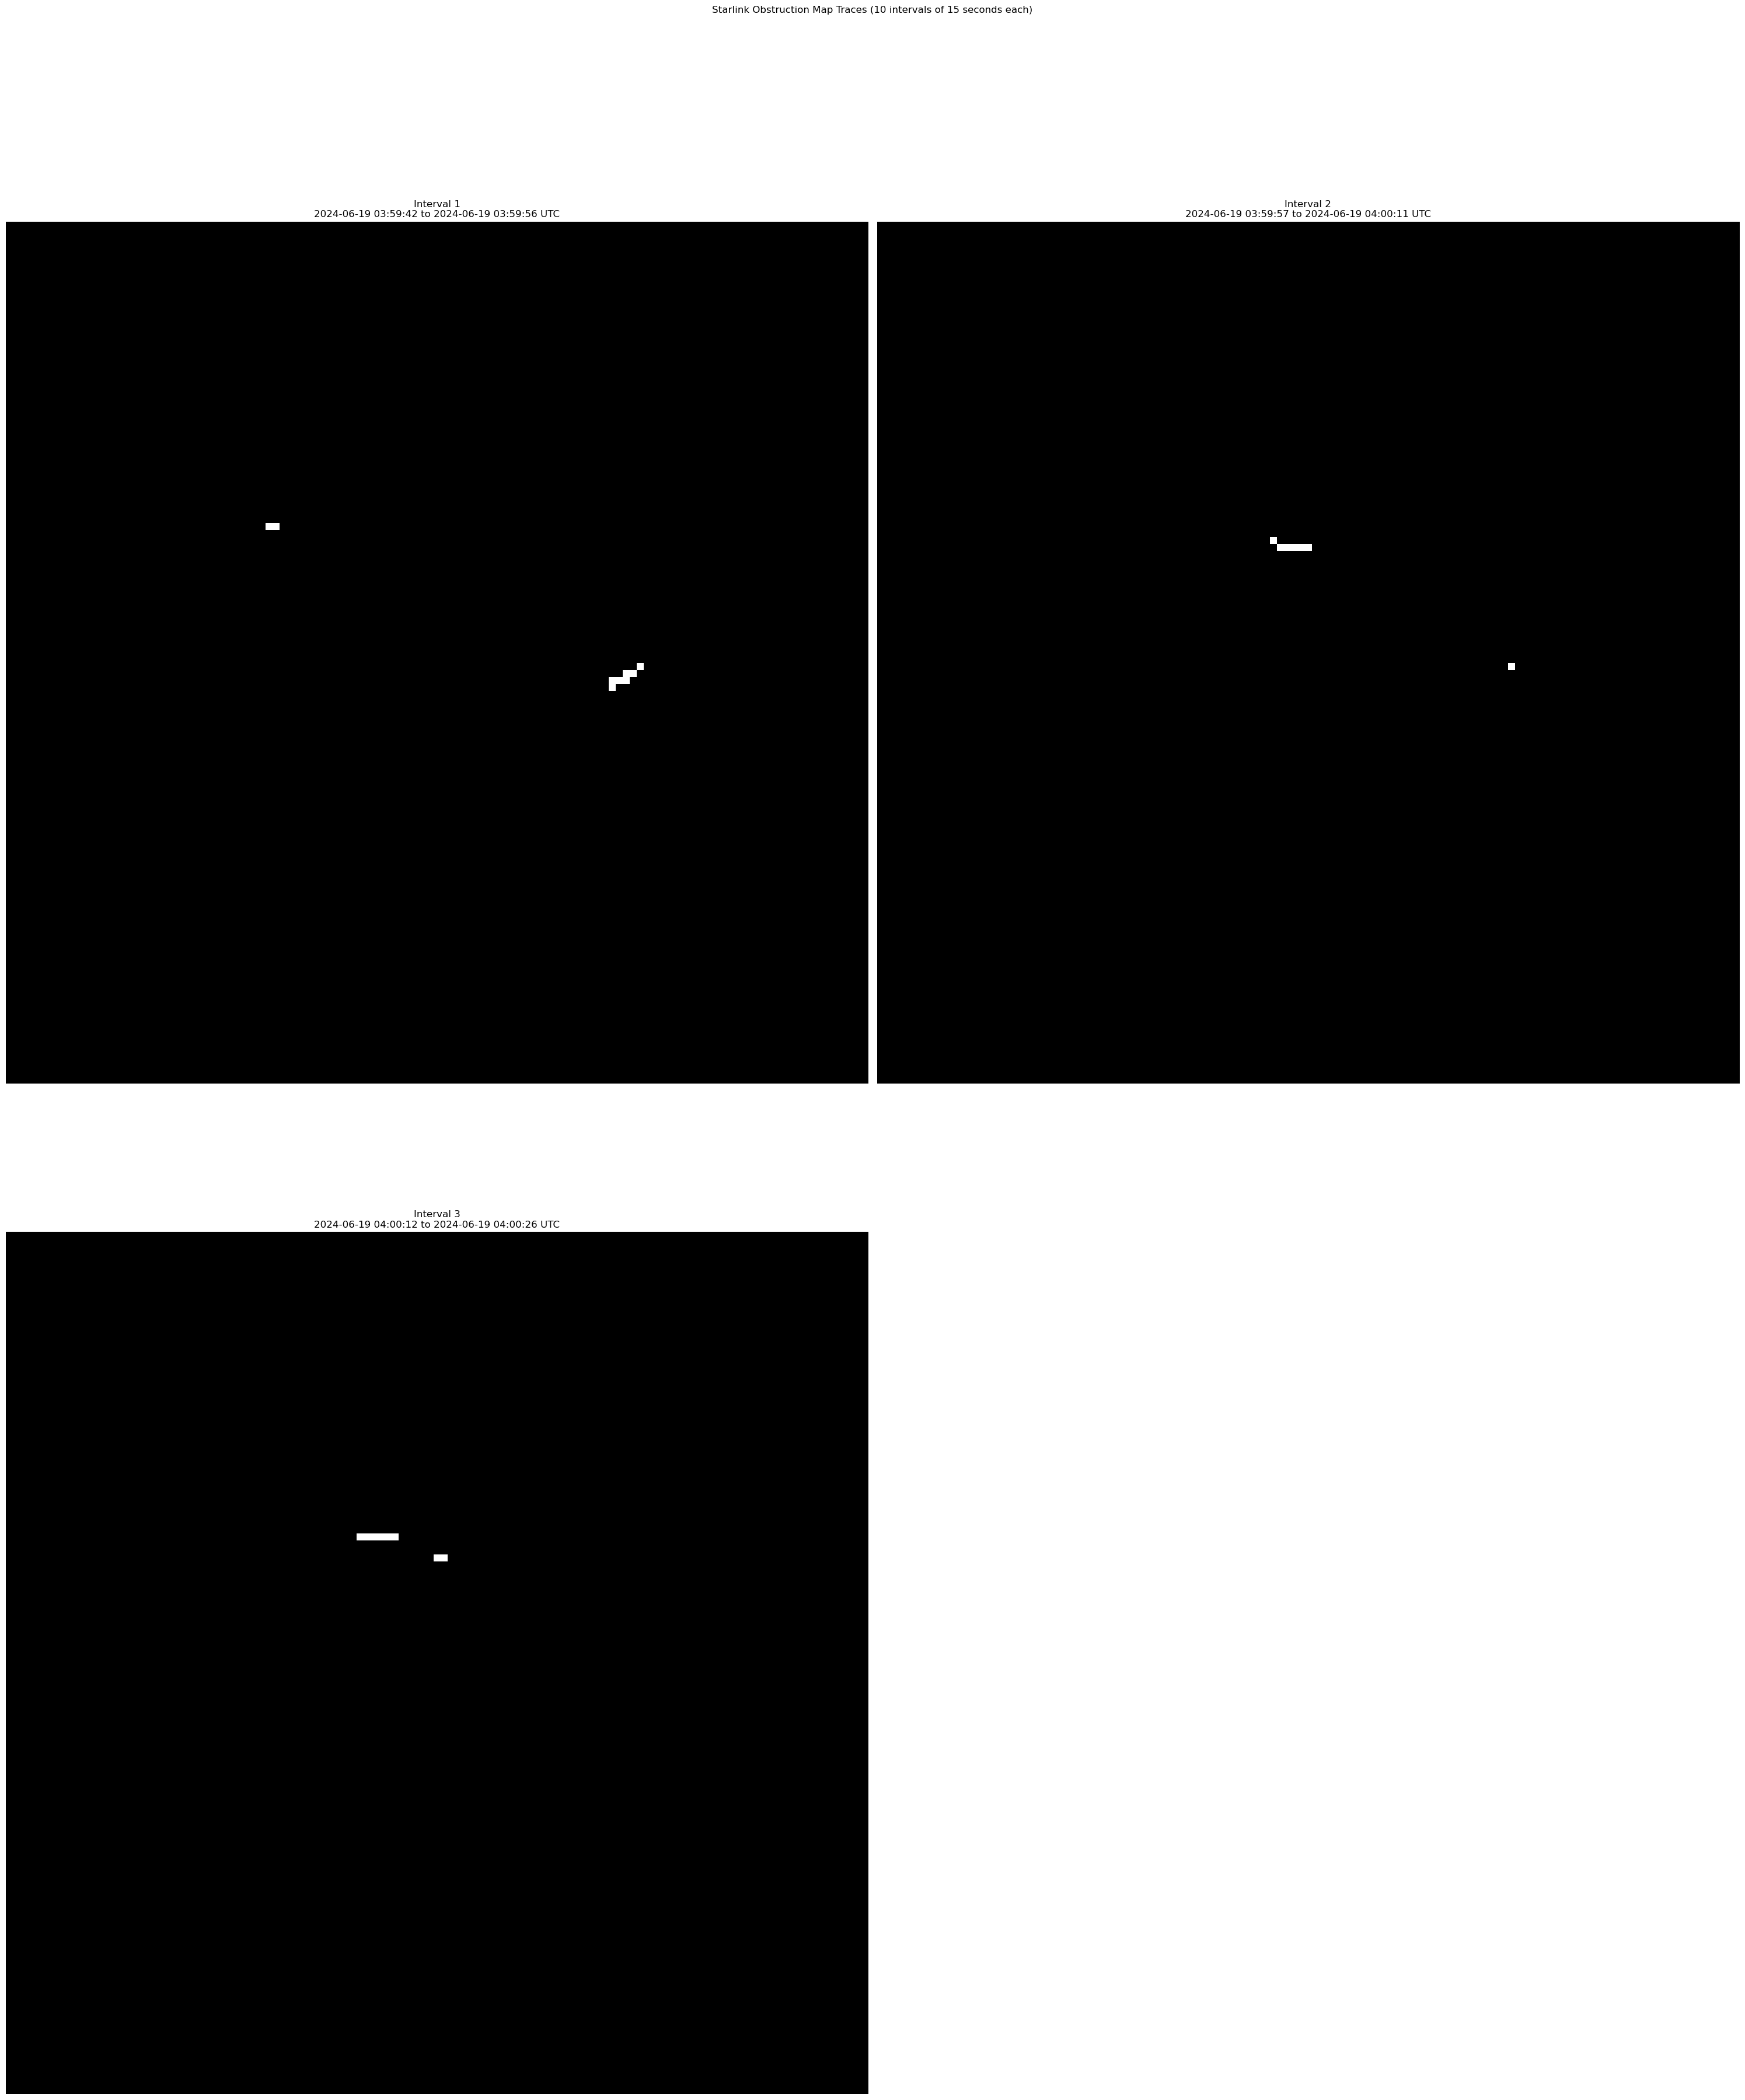

In [43]:
import sys
import os
import numpy as np
import time
import math
# Add the path to starlink-grpc-tools-main to the system path
sys.path.append(os.path.abspath('E:/SatInView/starlink-grpc-tools-main'))
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt



def capture_snr_data(start_time,duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = start_time + timedelta(seconds=duration_seconds)
    while datetime.utcnow()  < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def save_white_pixel_coordinates(snapshots, start_time):
    white_pixel_coords = set()  # Use a set to store unique coordinates
    for snr_data in snapshots:
        coords = np.argwhere(snr_data == 1)
        for coord in coords:
            white_pixel_coords.add(tuple(coord))  # Add each coordinate as a tuple to the set

    with open('white_pixel_coordinates.txt', 'a') as f:
        f.write(f"{start_time}:\n")
        for coord in sorted(white_pixel_coords):  # Sort coordinates for consistency
            f.write(f"{coord}\n")
        f.write("\n")

def plot_snr_traces(all_snapshots, start_times, end_times,r):
    plt.figure(figsize=(30, 40))  # Increase the figure size for better resolution
    for i, (snapshots, start_time, end_time) in enumerate(zip(all_snapshots, start_times, end_times)):
        base_image = np.zeros_like(snapshots[0])
        for snr_data in snapshots:
            base_image = np.maximum(base_image, snr_data)

        plt.subplot(r//2+1, 2, i + 1)  # Arrange plots in a 5x2 grid
        plt.imshow(base_image, cmap='gray', origin='lower')
        plt.title(f'Interval {i+1}\n{start_time} to {end_time} UTC')
        plt.axis('off')

    plt.suptitle('Starlink Obstruction Map Traces (10 intervals of 15 seconds each)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the main title
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
              # Check every 0.5 seconds
            time.sleep(0.5)

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

all_snapshots = []
start_times = []
end_times = []
r=3

for _ in range(r):
    wait_until_target_time()
    duration_seconds = 14
    interval_seconds = 0.5  # Capture a snapshot every 1 second

    start_time = datetime.utcnow()
    snapshots = capture_snr_data(start_time,duration_seconds, interval_seconds, context)
    start_time = start_time.strftime("%Y-%m-%d %H:%M:%S")
    end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    all_snapshots.append(snapshots)
    start_times.append(start_time)
    end_times.append(end_time)

    # Save white pixel coordinates to a file
    save_white_pixel_coordinates(snapshots, start_time)
    

# Plot all the traces
plot_snr_traces(all_snapshots, start_times, end_times,r)


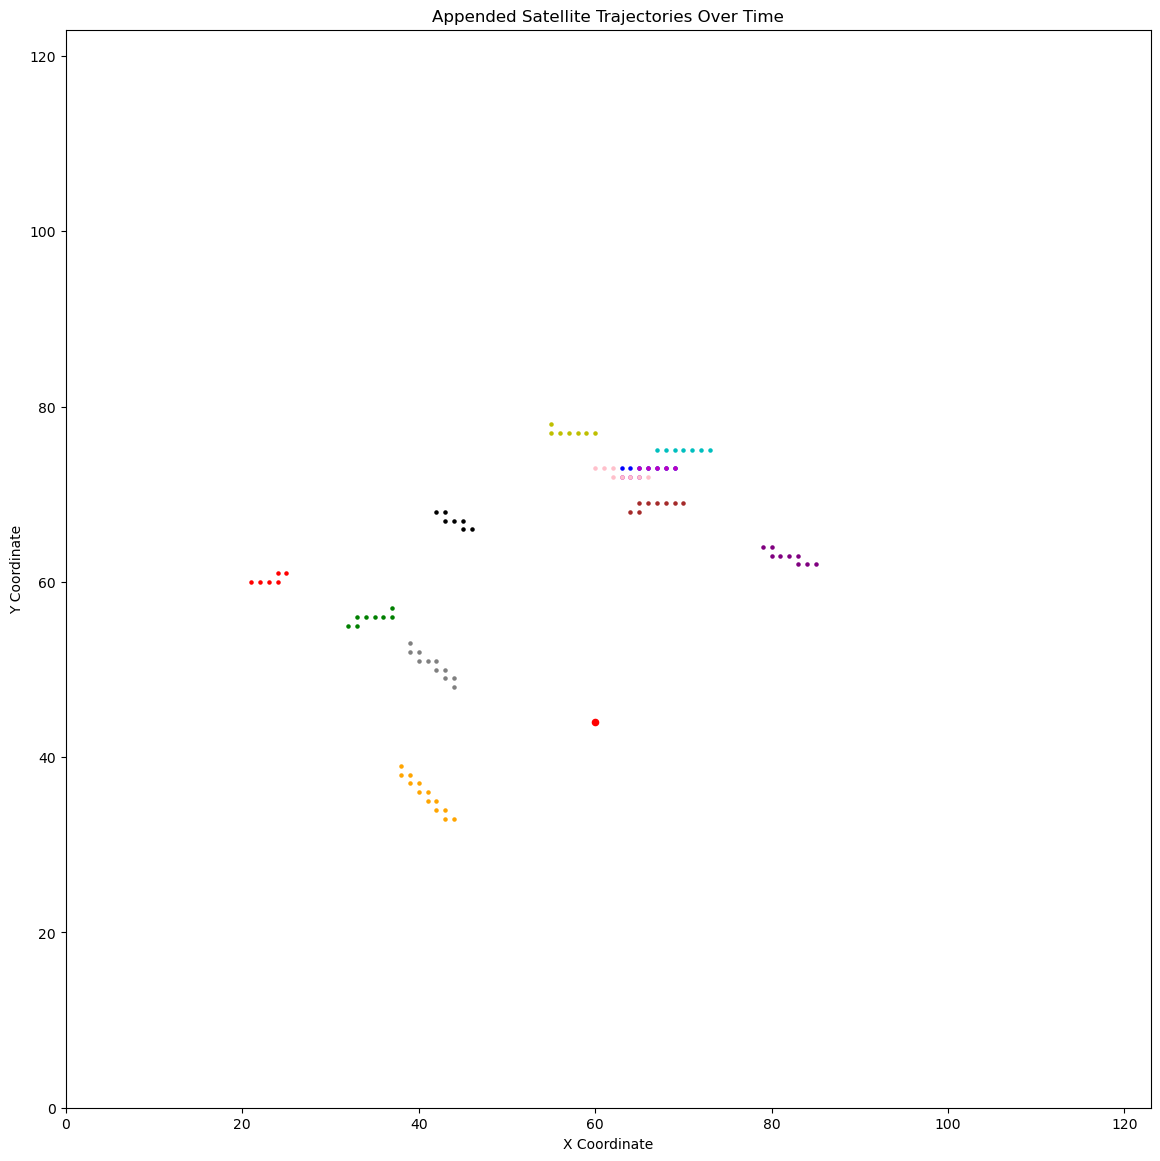

In [44]:
import matplotlib.pyplot as plt

def plot_coordinates_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    plt.figure(figsize=(14, 14))
    current_start_time = None
    coordinates = []
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'grey', 'lime', 'indigo', 'turquoise']
    color_index = 0
    i=0
    for line in lines:
        line = line.strip()
        if line.endswith(":"):
            if current_start_time is not None and coordinates:
                y, x = zip(*coordinates)  # Correct the order of coordinates
                plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time,s=5)
                color_index += 1

            current_start_time = line[:-1]
            coordinates = []
        elif line:
            coord = tuple(map(int, line.strip('()').split(', ')))
            coordinates.append(coord)
    plt.xlim(0, 123)
    plt.ylim(0, 123)
    if current_start_time is not None and coordinates:
        y, x = zip(*coordinates)  # Correct the order of coordinates
        plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time,s=5)
    # plt.scatter(62, 66, color='red',s=1)
    # plt.scatter(60, 62-20, color='red',s=10)
    plt.scatter(60, 44, color='red',s=20)
    # plt.scatter(44, 41, color='red',s=10)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Appended Satellite Trajectories Over Time')
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

# Plot coordinates from the file
plot_coordinates_from_file('white_pixel_coordinates.txt')

In [45]:
df_means

NameError: name 'df_means' is not defined

In [1]:
import matplotlib.pyplot as plt

def plot_coordinates_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    plt.figure(figsize=(14, 14))
    current_start_time = None
    coordinates = []
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'grey', 'lime', 'indigo', 'turquoise']
    color_index = 0
    i=0
    for line in lines:
        line = line.strip()
        if line.endswith(":"):
            if current_start_time is not None and coordinates:
                y, x = zip(*coordinates)  # Correct the order of coordinates
                plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time,s=5)
                color_index += 1

            current_start_time = line[:-1]
            coordinates = []
        elif line:
            coord = tuple(map(int, line.strip('()').split(', ')))
            coordinates.append(coord)
    plt.xlim(0, 123)
    plt.ylim(0, 123)
    if current_start_time is not None and coordinates:
        y, x = zip(*coordinates)  # Correct the order of coordinates
        plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time,s=5)
    # plt.scatter(62, 66, color='red',s=1)
    # plt.scatter(60, 62-20, color='red',s=10)
    plt.scatter(60, 62-22, color='red',s=20)
    # plt.scatter(44, 41, color='red',s=10)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Appended Satellite Trajectories Over Time')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

# Plot coordinates from the file
plot_coordinates_from_file('white_pixel_coordinates_xor.csv')

ValueError: invalid literal for int() with base 10: '2024-06-22 00:10:12,71,76'

<Figure size 1400x1400 with 0 Axes>

Loaded 6147 satellites


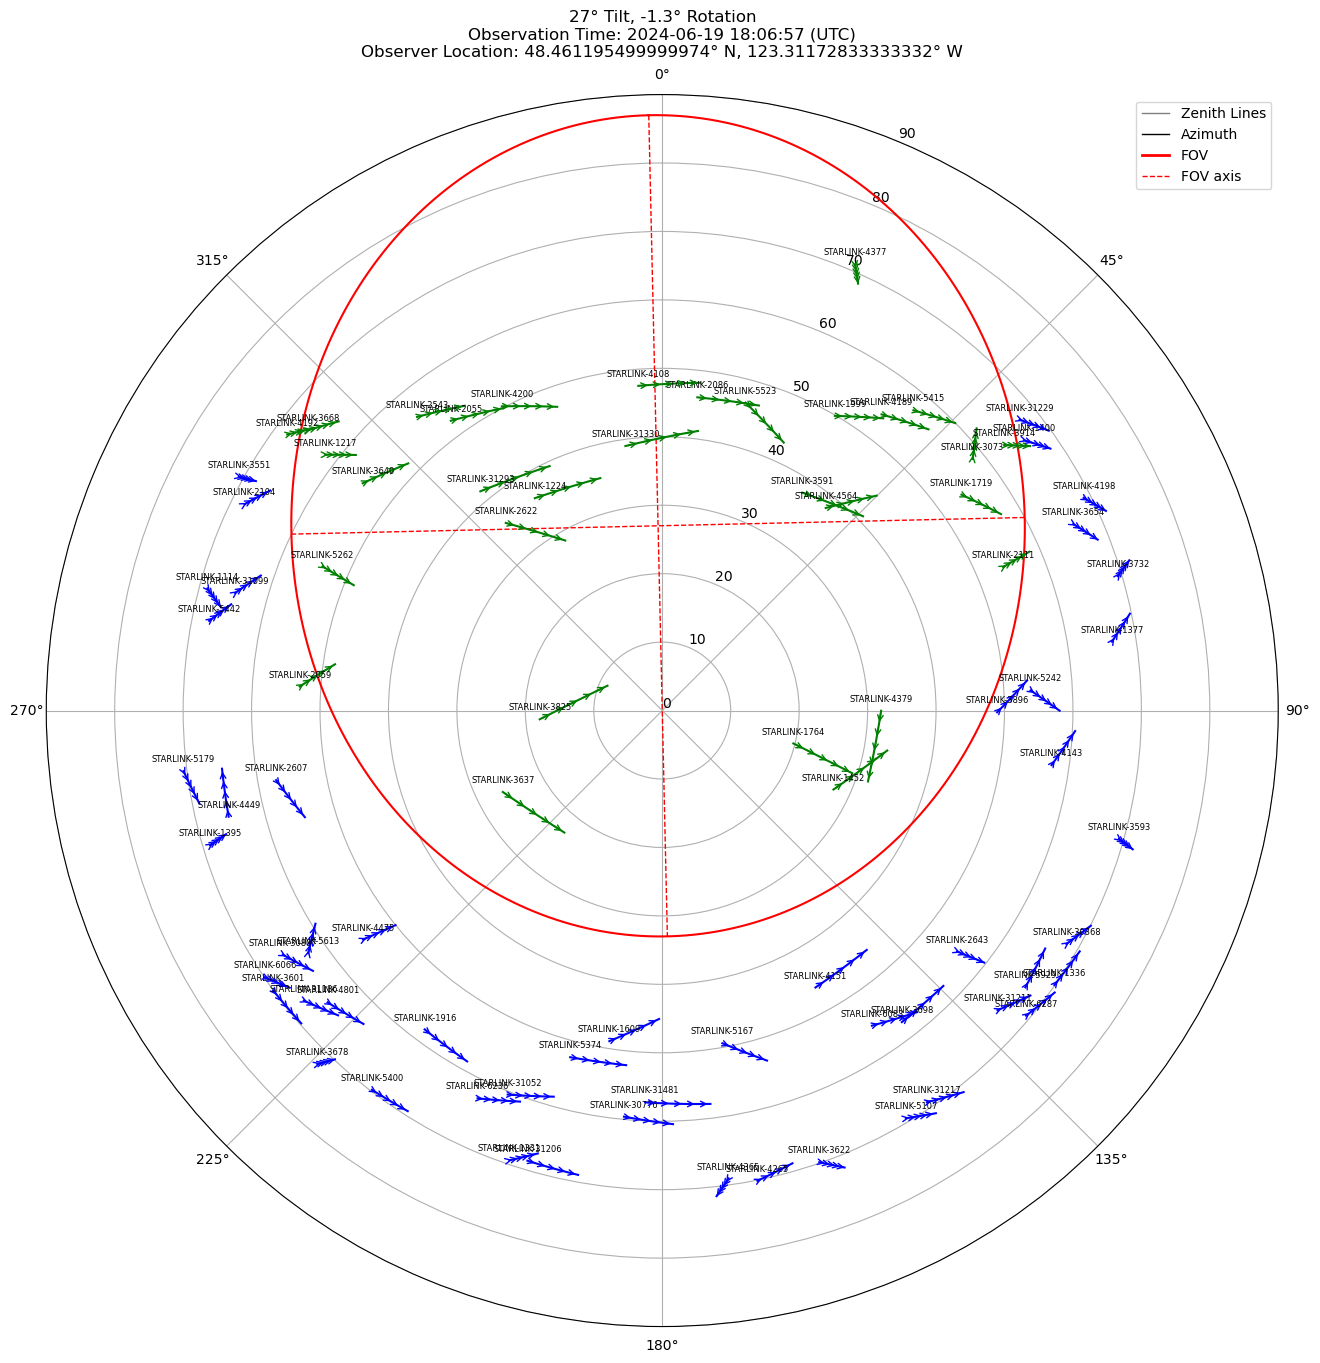

Satellites inside the FOV: ['STARLINK-1224', 'STARLINK-1217', 'STARLINK-1452', 'STARLINK-1719', 'STARLINK-1764', 'STARLINK-2055', 'STARLINK-2086', 'STARLINK-2111', 'STARLINK-1999', 'STARLINK-2059', 'STARLINK-2543', 'STARLINK-2622', 'STARLINK-3073', 'STARLINK-3637', 'STARLINK-3591', 'STARLINK-3640', 'STARLINK-3668', 'STARLINK-3825', 'STARLINK-3914', 'STARLINK-4108', 'STARLINK-4189', 'STARLINK-4200', 'STARLINK-4192', 'STARLINK-4379', 'STARLINK-4377', 'STARLINK-4564', 'STARLINK-5262', 'STARLINK-5415', 'STARLINK-5523', 'STARLINK-31330', 'STARLINK-31293']
Closest satellites at the start of the interval (in order):
STARLINK-3825: 569.87 km
STARLINK-1764: 582.95 km
STARLINK-3637: 600.53 km
STARLINK-31330: 612.86 km
STARLINK-1452: 615.34 km
STARLINK-31293: 633.84 km
STARLINK-4379: 660.43 km
STARLINK-2622: 666.13 km
STARLINK-1224: 670.22 km
STARLINK-3591: 674.64 km
STARLINK-4564: 675.56 km
STARLINK-4151: 754.67 km
STARLINK-2086: 764.72 km
STARLINK-31481: 771.99 km
STARLINK-4108: 773.36 km
STARL

In [69]:
from skyfield.api import load, wgs84
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import math
from concurrent.futures import ThreadPoolExecutor

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time_now():
    ts = load.timescale()
    return ts.now() - timedelta(seconds=1)

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation):
    positions = []
    altitudes = []
    distances = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        positions.append((90 - alt.degrees, np.radians(az.degrees)))
        altitudes.append(alt.degrees)
        distances.append(distance.km)

    if any(alt > min_elevation for alt in altitudes):
        return satellite.name, positions, distances[0]
    return None

def calculate_satellite_positions_over_time(satellites, observer_location, start_time, interval_seconds, step_seconds=3):
    min_elevation = 20
    positions_over_time = {}
    satellite_distances = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_positions_for_satellite, satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation) for satellite in satellites]
        for future in futures:
            result = future.result()
            if result is not None:
                satellite_name, positions, initial_distance = result
                positions_over_time[satellite_name] = positions
                satellite_distances.append((satellite_name, initial_distance))

    # Sort satellites by initial distance
    satellite_distances.sort(key=lambda x: x[1])
    
    return positions_over_time, satellite_distances

def rotate_points(x, y, angle):
    x_rot = x * np.cos(angle) - y * np.sin(angle)
    y_rot = x * np.sin(angle) + y * np.cos(angle)
    return x_rot, y_rot

def draw_fov(tilt_deg, rotation_deg, positions_over_time, observation_time, observer_location):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(16, 16))

    # Plot settings
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    zenith_legend = plt.Line2D([0], [0], color='gray', linestyle='-', linewidth=1, label='Zenith Lines')
    azimuth_legend = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Azimuth')
    FOV = plt.Line2D([0], [0], color='red', linestyle='-', linewidth=2, label='FOV')
    Axis = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='FOV axis')
    ax.add_artist(zenith_legend)
    ax.add_artist(azimuth_legend)
    ax.add_artist(FOV)
    ax.add_artist(Axis)

    # FOV ellipse
    base_radius = 60
    center_shift = tilt_deg
    x_radius = base_radius
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)

    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta) + center_shift
    y = y_radius * np.sin(theta)
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x) + np.deg2rad(rotation_deg)
    ax.plot(angles, r, 'r')

    # Plot major and minor axes
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, np.deg2rad(rotation_deg))
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, np.deg2rad(rotation_deg))
    ax.plot(np.arctan2(major_axis_y_rot, major_axis_x_rot), np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2), 'red', linestyle='--', linewidth=1)
    ax.plot(np.arctan2(minor_axis_y_rot, minor_axis_x_rot), np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2), 'red', linestyle='--', linewidth=1)

    inside_fov = []

    # Plot satellite traces with arrows
    for satellite_name, positions in positions_over_time.items():
        r = [pos[0] for pos in positions]
        angle = [pos[1] for pos in positions]
        inside = False
        for r_i, angle_i in zip(r, angle):
            x_point = r_i * np.cos(angle_i)
            y_point = r_i * np.sin(angle_i)
            x_point_rot, y_point_rot = rotate_points(x_point, y_point, -np.deg2rad(rotation_deg))
            x_point_rot -= center_shift
            if (x_point_rot**2 / x_radius**2) + (y_point_rot**2 / y_radius**2) <= 1:
                inside = True
                break
        color = "g" if inside else "b"
        ax.plot(angle, r, color=color)
        for i in range(0, len(angle) - 1, max(1, len(angle) // 10)):
            ax.annotate('', xy=(angle[i + 1], r[i + 1]), xytext=(angle[i], r[i]),
                        arrowprops=dict(arrowstyle='->', color=color))
        if inside:
            inside_fov.append(satellite_name)
        ax.annotate(satellite_name, xy=(angle[0], r[0]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=6, bbox=dict(boxstyle='round,pad=0.5', edgecolor='none', facecolor='none', alpha=0.6))

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Format the observation time
    observation_time_str = observation_time.utc_strftime('%Y-%m-%d %H:%M:%S (UTC)')
    latitude_str = f"{abs(observer_location.latitude.degrees)}° {'N' if observer_location.latitude.degrees >= 0 else 'S'}"
    longitude_str = f"{abs(observer_location.longitude.degrees)}° {'E' if observer_location.longitude.degrees >= 0 else 'W'}"
    observer_location_str = f"{latitude_str}, {longitude_str}"
    ax.set_title(f'{tilt_deg}° Tilt, {rotation_deg}° Rotation\nObservation Time: {observation_time_str}\nObserver Location: {observer_location_str}', va='bottom')

    plt.show()
    print("Satellites inside the FOV:", inside_fov)

if __name__ == "__main__":
    satellites = load_data()
    initial_time = set_observation_time(2024, 6, 19, 18, 7, 12)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    interval_seconds = 15
    positions_over_time, satellite_distances = calculate_satellite_positions_over_time(satellites, observer_location, initial_time, interval_seconds, step_seconds=3)
    draw_fov(27, -1.3, positions_over_time, initial_time, observer_location)
    
    # Output the closest satellites at the start of the interval
    print("Closest satellites at the start of the interval (in order):")
    for name, distance in satellite_distances:
        print(f"{name}: {distance:.2f} km")


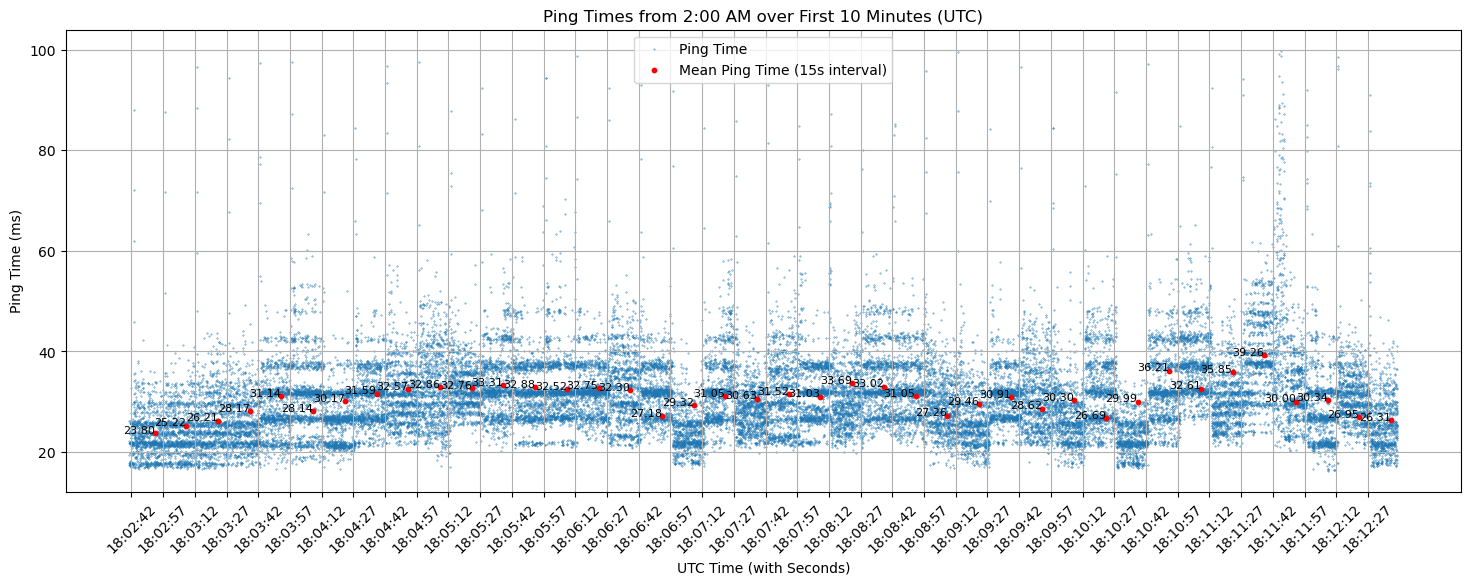

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'outping.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Setting the start time to 2 am on the day of the earliest timestamp
earliest_time = df['UTC Time'].min()
# start_time = earliest_time
start_time = earliest_time.replace(hour=18, minute=2, second=41, microsecond=0)
end_time = start_time + pd.Timedelta(minutes=10)
filtered_df = df[(df['UTC Time'] >= start_time) & (df['UTC Time'] <= end_time)]

# Generating x-ticks at specific seconds of each minute
xticks = pd.date_range(start=start_time, end=end_time, freq='S')
xticks = xticks[xticks.second.isin([12, 27, 42, 57])]

# Calculate mean ping time for each 15-second interval
intervals = [12, 27, 42, 57]
mean_ping_times = []
for minute in range(10):
    for start_second in intervals:
        interval_start = start_time + pd.Timedelta(minutes=minute, seconds=start_second)
        interval_end = interval_start + pd.Timedelta(seconds=15)
        interval_data = filtered_df[(filtered_df['UTC Time'] >= interval_start) & (filtered_df['UTC Time'] < interval_end)]
        if not interval_data.empty:
            mean_ping_time = interval_data['Ping Time'].mean()
            mean_ping_times.append((interval_start, mean_ping_time))

# Plotting the data as a scatter plot with smaller markers
plt.figure(figsize=(18, 6))
plt.scatter(filtered_df['UTC Time'], filtered_df['Ping Time'], marker='o', s=0.1, label='Ping Time')  # s controls the size of the markers

# Plotting the mean ping times
mean_times = [x[0] for x in mean_ping_times]
mean_values = [x[1] for x in mean_ping_times]
plt.scatter(mean_times, mean_values, color='red', marker='o', s=10, label='Mean Ping Time (15s interval)')

# Adding text annotations for mean values
for t, v in zip(mean_times, mean_values):
    plt.text(t, v, f'{v:.2f}', fontsize=8, ha='right')

plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Ping Time (ms)')
plt.title('Ping Times from 2:00 AM over First 10 Minutes (UTC)')
plt.xticks(xticks, xticks.strftime('%H:%M:%S'), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


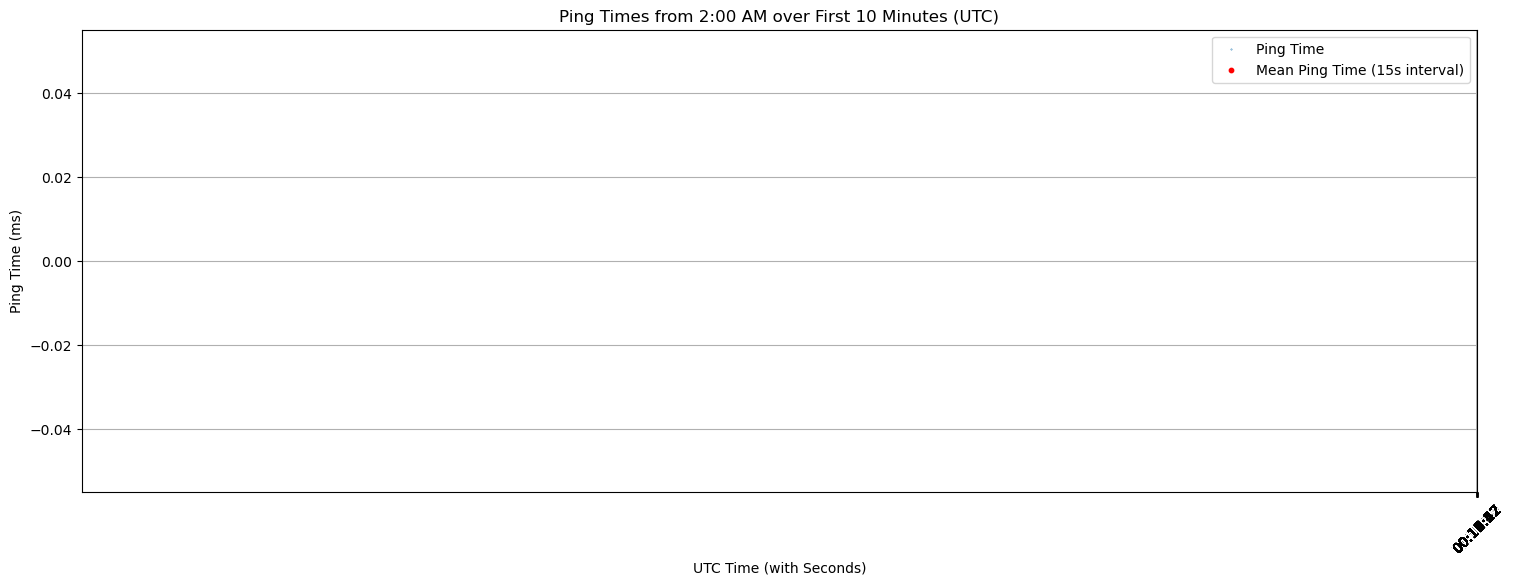

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'outping.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Setting the start time to a specific time on the day of the earliest timestamp
earliest_time = df['UTC Time'].min()
# start_time = earliest_time
start_time = earliest_time.replace(hour=0, minute=10, second=0, microsecond=0)
end_time = start_time + pd.Timedelta(minutes=10)
filtered_df = df[(df['UTC Time'] >= start_time) & (df['UTC Time'] <= end_time)]

# Generating x-ticks at specific seconds of each minute
xticks = pd.date_range(start=start_time, end=end_time, freq='S')
xticks = xticks[xticks.second.isin([12, 27, 42, 57])]

# Calculate mean ping time for each 15-second interval
intervals = [12, 27, 42, 57]
mean_ping_times = []
for minute in range(10):
    for start_second in intervals:
        interval_start = start_time + pd.Timedelta(minutes=minute, seconds=start_second)
        interval_end = interval_start + pd.Timedelta(seconds=15)
        interval_data = filtered_df[(filtered_df['UTC Time'] >= interval_start) & (filtered_df['UTC Time'] < interval_end)]
        if not interval_data.empty:
            mean_ping_time = interval_data['Ping Time'].mean()
            mean_ping_times.append((interval_start, mean_ping_time))

# Plotting the data as a scatter plot with smaller markers
plt.figure(figsize=(18, 6))
plt.scatter(filtered_df['UTC Time'], filtered_df['Ping Time'], marker='o', s=0.1, label='Ping Time')  # s controls the size of the markers

# Plotting the mean ping times
mean_times = [x[0] for x in mean_ping_times]
mean_values = [x[1] for x in mean_ping_times]
plt.scatter(mean_times, mean_values, color='red', marker='o', s=10, label='Mean Ping Time (15s interval)')

# Adding text annotations for mean values
for t, v in zip(mean_times, mean_values):
    plt.text(t, v, f'{v:.2f}', fontsize=8, ha='right')

plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Ping Time (ms)')
plt.title('Ping Times from 2:00 AM over First 10 Minutes (UTC)')
plt.xticks(xticks, xticks.strftime('%H:%M:%S'), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_coordinates_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    plt.figure(figsize=(14, 14))
    current_start_time = None
    coordinates = []
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'grey', 'lime', 'indigo', 'turquoise']
    color_index = 0
    
    # Observer's location and conversion factor
    observer_y, observer_x = 59, 40  # Assume the observer's location at (60, 40)
    pixel_to_degrees = 62 / 62  # Conversion from pixel to degrees

    # Collect details
    details = []

    for line in lines:
        line = line.strip()
        if line.endswith(":"):
            # Process previous data before resetting
            if current_start_time is not None and coordinates:
                # Plot the previous set of coordinates
                y, x = zip(*coordinates)
                plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time, s=5)

                print(f"Time Interval: {current_start_time}, Color: {colors[color_index % len(colors)]}")
                for coord in coordinates:
                    dx, dy = coord[0] - observer_x, coord[1] - observer_y
                    radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
                    angle = np.degrees(np.arctan2(dy, dx))
                    elevation = 90 - radius
                    print(f"Elevation: {elevation:.2f}°, Azimuth: {angle:.2f}°")

                # Increment to next color
                color_index += 1

            # Reset for new interval
            current_start_time = line[:-1]
            coordinates = []
        elif line:
            coord = tuple(map(int, line.strip('()').split(', ')))
            coordinates.append(coord)

    # Last group processing
    if current_start_time is not None and coordinates:
        # Plot the last set of coordinates
        y, x = zip(*coordinates)
        plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time, s=5)

        print(f"Time Interval: {current_start_time}, Color: {colors[color_index % len(colors)]}")
        for coord in coordinates:
            dx, dy = coord[0] - observer_x, coord[1] - observer_y
            radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
            angle = np.degrees(np.arctan2(dy, dx))
            elevation = 90 - radius
            print(f"Elevation: {elevation:.2f}°, Azimuth: {angle:.2f}°")

    plt.xlim(0, 123)
    plt.ylim(0, 123)
    plt.scatter(observer_y, observer_x, color='red', s=20)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Appended Satellite Trajectories Over Time')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

# Plot coordinates from the file
plot_coordinates_from_file('white_pixel_coordinates_xor.csv')


ValueError: invalid literal for int() with base 10: '2024-06-22 00:10:12,71,76'

<Figure size 1400x1400 with 0 Axes>

Loaded 6147 satellites


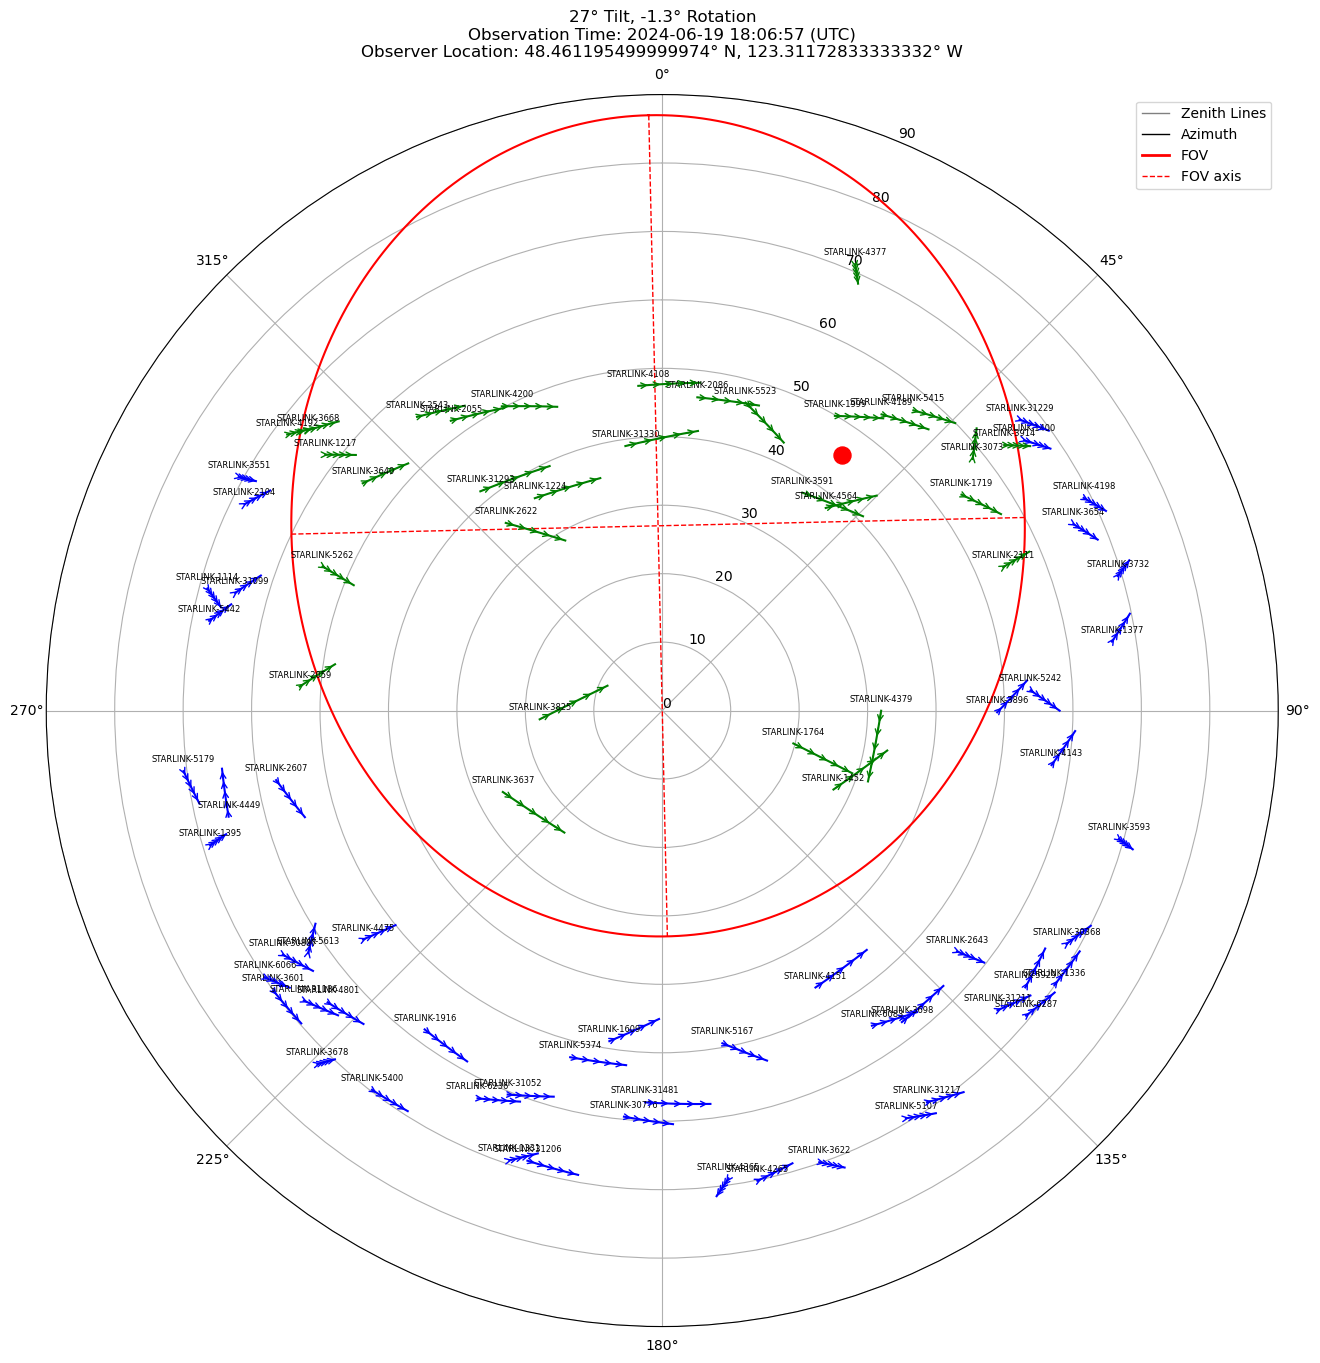

Satellites inside the FOV: ['STARLINK-1224', 'STARLINK-1217', 'STARLINK-1452', 'STARLINK-1719', 'STARLINK-1764', 'STARLINK-2055', 'STARLINK-2086', 'STARLINK-2111', 'STARLINK-1999', 'STARLINK-2059', 'STARLINK-2543', 'STARLINK-2622', 'STARLINK-3073', 'STARLINK-3637', 'STARLINK-3591', 'STARLINK-3640', 'STARLINK-3668', 'STARLINK-3825', 'STARLINK-3914', 'STARLINK-4108', 'STARLINK-4189', 'STARLINK-4200', 'STARLINK-4192', 'STARLINK-4379', 'STARLINK-4377', 'STARLINK-4564', 'STARLINK-5262', 'STARLINK-5415', 'STARLINK-5523', 'STARLINK-31330', 'STARLINK-31293']
Closest satellites at the start of the interval (in order):


In [11]:
from skyfield.api import load, wgs84
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import math
from concurrent.futures import ThreadPoolExecutor

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time_now():
    ts = load.timescale()
    return ts.now() - timedelta(seconds=1)

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation):
    positions = []
    altitudes = []
    distances = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        positions.append((90 - alt.degrees, np.radians(az.degrees)))
        altitudes.append(alt.degrees)
        distances.append(distance.km)

    if any(alt > min_elevation for alt in altitudes):
        return satellite.name, positions, distances[0]
    return None

def calculate_satellite_positions_over_time(satellites, observer_location, start_time, interval_seconds, step_seconds=3):
    min_elevation = 20
    positions_over_time = {}
    satellite_distances = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_positions_for_satellite, satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation) for satellite in satellites]
        for future in futures:
            result = future.result()
            if result is not None:
                satellite_name, positions, initial_distance = result
                positions_over_time[satellite_name] = positions
                satellite_distances.append((satellite_name, initial_distance))

    # Sort satellites by initial distance
    satellite_distances.sort(key=lambda x: x[1])
    
    return positions_over_time, satellite_distances

def rotate_points(x, y, angle):
    x_rot = x * np.cos(angle) - y * np.sin(angle)
    y_rot = x * np.sin(angle) + y * np.cos(angle)
    return x_rot, y_rot

def draw_fov(tilt_deg, rotation_deg, positions_over_time, observation_time, observer_location):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(16, 16))

    # Plot settings
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    zenith_legend = plt.Line2D([0], [0], color='gray', linestyle='-', linewidth=1, label='Zenith Lines')
    azimuth_legend = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Azimuth')
    FOV = plt.Line2D([0], [0], color='red', linestyle='-', linewidth=2, label='FOV')
    Axis = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='FOV axis')
    ax.add_artist(zenith_legend)
    ax.add_artist(azimuth_legend)
    ax.add_artist(FOV)
    ax.add_artist(Axis)

    # FOV ellipse
    base_radius = 60
    center_shift = tilt_deg
    x_radius = base_radius
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)

    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta) + center_shift
    y = y_radius * np.sin(theta)
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x) + np.deg2rad(rotation_deg)
    ax.plot(angles, r, 'r')

    # Plot major and minor axes
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, np.deg2rad(rotation_deg))
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, np.deg2rad(rotation_deg))
    ax.plot(np.arctan2(major_axis_y_rot, major_axis_x_rot), np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2), 'red', linestyle='--', linewidth=1)
    ax.plot(np.arctan2(minor_axis_y_rot, minor_axis_x_rot), np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2), 'red', linestyle='--', linewidth=1)

    inside_fov = []

    # Plot satellite traces with arrows
    for satellite_name, positions in positions_over_time.items():
        r = [pos[0] for pos in positions]
        angle = [pos[1] for pos in positions]
        inside = False
        for r_i, angle_i in zip(r, angle):
            x_point = r_i * np.cos(angle_i)
            y_point = r_i * np.sin(angle_i)
            x_point_rot, y_point_rot = rotate_points(x_point, y_point, -np.deg2rad(rotation_deg))
            x_point_rot -= center_shift
            if (x_point_rot**2 / x_radius**2) + (y_point_rot**2 / y_radius**2) <= 1:
                inside = True
                break
        color = "g" if inside else "b"
        ax.plot(angle, r, color=color)
        for i in range(0, len(angle) - 1, max(1, len(angle) // 10)):
            ax.annotate('', xy=(angle[i + 1], r[i + 1]), xytext=(angle[i], r[i]),
                        arrowprops=dict(arrowstyle='->', color=color))
        if inside:
            inside_fov.append(satellite_name)
        ax.annotate(satellite_name, xy=(angle[0], r[0]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=6, bbox=dict(boxstyle='round,pad=0.5', edgecolor='none', facecolor='none', alpha=0.6))

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Format the observation time
    observation_time_str = observation_time.utc_strftime('%Y-%m-%d %H:%M:%S (UTC)')
    latitude_str = f"{abs(observer_location.latitude.degrees)}° {'N' if observer_location.latitude.degrees >= 0 else 'S'}"
    longitude_str = f"{abs(observer_location.longitude.degrees)}° {'E' if observer_location.longitude.degrees >= 0 else 'W'}"
    observer_location_str = f"{latitude_str}, {longitude_str}"
    ax.set_title(f'{tilt_deg}° Tilt, {rotation_deg}° Rotation\nObservation Time: {observation_time_str}\nObserver Location: {observer_location_str}', va='bottom')
    ax.scatter(np.deg2rad(35.16), 45.72, color='red', marker='o', s=150)
    plt.show()
    print("Satellites inside the FOV:", inside_fov)

if __name__ == "__main__":
    satellites = load_data()
    initial_time = set_observation_time(2024, 6, 19, 18, 6, 57)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    interval_seconds = 15
    positions_over_time, satellite_distances = calculate_satellite_positions_over_time(satellites, observer_location, initial_time, interval_seconds, step_seconds=3)
    draw_fov(27, -1.3, positions_over_time, initial_time, observer_location)
    
    # Output the closest satellites at the start of the interval
    print("Closest satellites at the start of the interval (in order):")
    # for name, distance in satellite_distances:
    #     print(f"{name}: {distance:.2f} km")


Data loaded from CSV:
            Timestamp   Y   X
0 2024-06-22 00:10:12  71  76
1 2024-06-22 00:10:13  71  76
2 2024-06-22 00:10:14  71  76
3 2024-06-22 00:10:15  71  77
4 2024-06-22 00:10:16  71  77
Filtered data:
              Timestamp   Y   X
0   2024-06-22 00:10:12  71  76
1   2024-06-22 00:10:13  71  76
2   2024-06-22 00:10:14  71  76
3   2024-06-22 00:10:15  71  77
4   2024-06-22 00:10:16  71  77
..                  ...  ..  ..
149 2024-06-22 00:12:51  75  56
150 2024-06-22 00:12:52  75  56
151 2024-06-22 00:12:53  75  57
152 2024-06-22 00:12:54  75  57
153 2024-06-22 00:12:55  75  58

[154 rows x 3 columns]
45.292812702014096
Interval starting at 2024-06-22 00:10:12, Mean Zenith: 45.29°, Mean Azimuth: 30.17°
Arrow from [76, 71] to [81, 70], Angle: -11.31°
35.42123405518381
Interval starting at 2024-06-22 00:10:27, Mean Zenith: 35.42°, Mean Azimuth: -6.07°
Arrow from [55, 69] to [61, 67], Angle: -18.43°
56.682214424742945
Interval starting at 2024-06-22 00:10:42, Mean Zenith: 

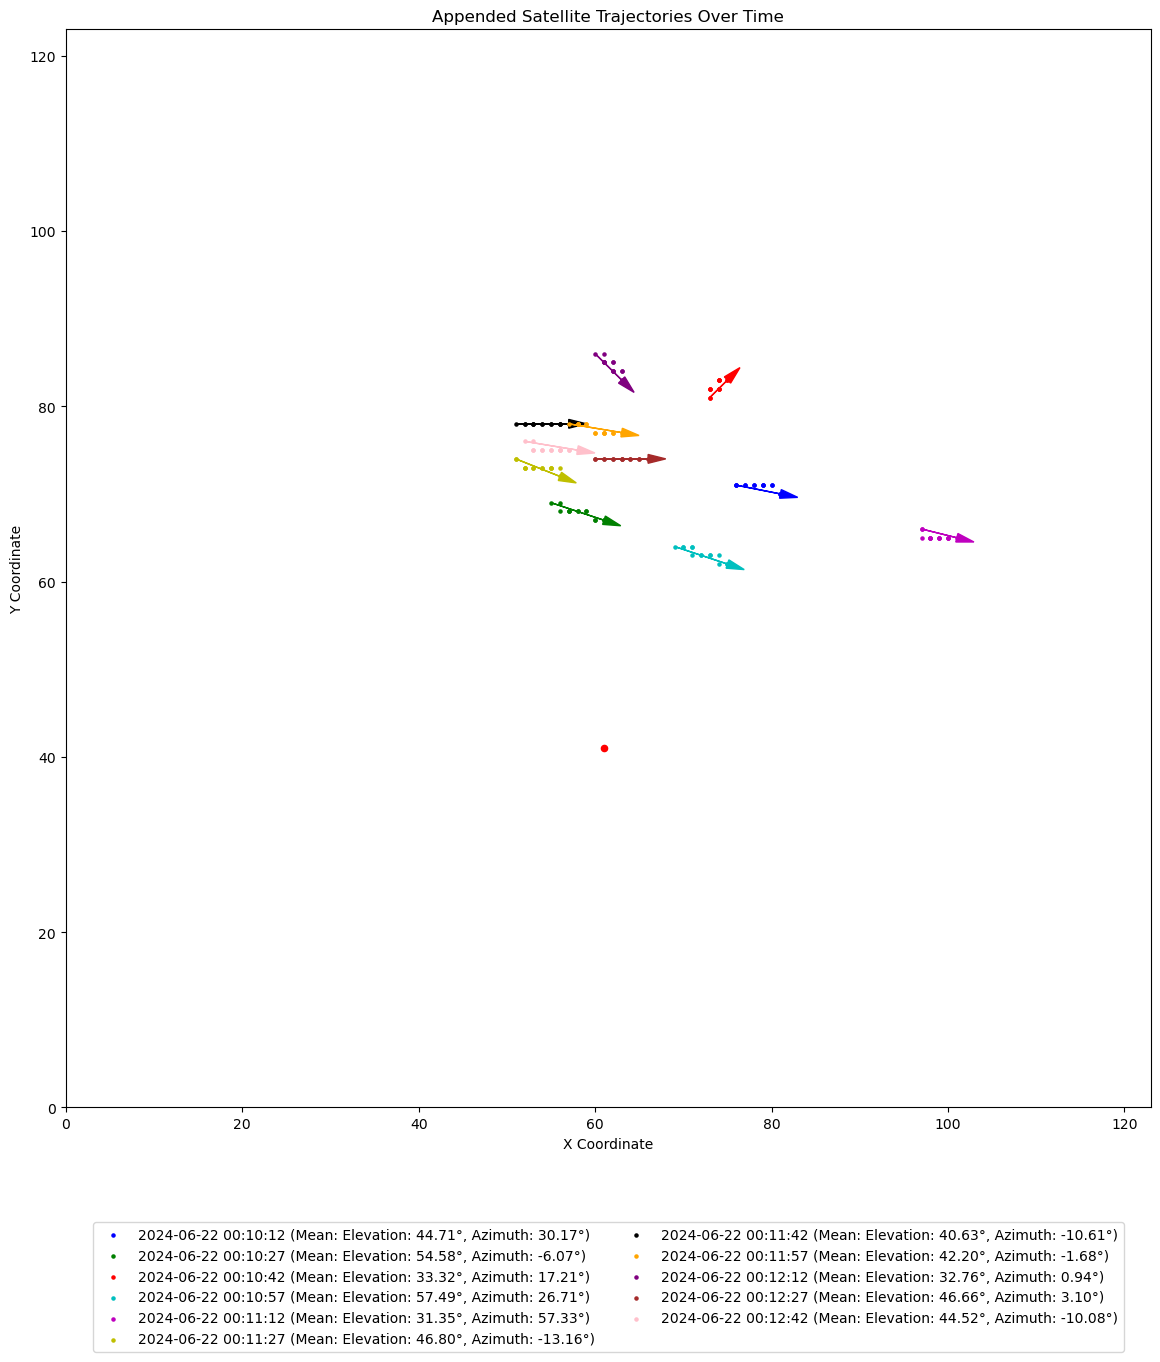

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_coordinates_from_csv(filename, start_time, end_time):
    # Read the data from CSV file with correct headers and comma separator
    data = pd.read_csv(filename, sep=',', header=None, names=['Timestamp', 'Y', 'X'])
    
    # Convert 'Timestamp' to datetime for easy filtering
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    
    # Debug: Print out the first few rows of the dataframe to verify the data
    print("Data loaded from CSV:")
    print(data.head())
    
    # Filter data by the specified timestamp range
    data = data[(data['Timestamp'] >= start_time) & (data['Timestamp'] <= end_time)]
    
    # Debug: Print the filtered data to verify the timestamps
    print("Filtered data:")
    print(data)
    
    plt.figure(figsize=(14, 14))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'grey', 'lime', 'indigo', 'turquoise']
    color_index = 0
    
    # Observer's location
    observer_x, observer_y = 61, 41  # Observer's location in pixel coordinates (swap x and y for correct azimuth calculation)
    pixel_to_degrees = 80/61  # Conversion factor from pixels to degrees, adjust as needed

    # Define the start seconds for each 15-second interval
    interval_starts = [12, 27, 42, 57]

    # Group data by each unique minute and process intervals within those minutes
    for minute in data['Timestamp'].dt.floor('T').unique():
        for interval_start in interval_starts:
            interval_start_time = minute + pd.to_timedelta(interval_start, unit='s')
            interval_end_time = interval_start_time + pd.to_timedelta(15, unit='s')
            interval_data = data[(data['Timestamp'] >= interval_start_time) &
                                 (data['Timestamp'] < interval_end_time)]
            if interval_data.empty:
                continue
            
            coordinates = interval_data[['X', 'Y']].values.tolist()
            
            # Calculate mean coordinates
            mean_x = np.mean([coord[0] for coord in coordinates])
            mean_y = np.mean([coord[1] for coord in coordinates])
            
            # Compute the azimuth and elevation from mean coordinates
            dx, dy = mean_x - observer_x, mean_y - observer_y
            radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
            print(radius)
            angle = np.degrees(np.arctan2(dx, dy))  # Swap dx and dy for correct azimuth calculation
            elevation = 90 - radius

            # Plot the points
            x, y = zip(*coordinates)
            plt.scatter(x, y, color=colors[color_index % len(colors)], label=f"{interval_start_time} (Mean: Elevation: {elevation:.2f}°, Azimuth: {angle:.2f}°)", s=5)

            # Output the mean elevation and azimuth
            print(f"Interval starting at {interval_start_time}, Mean Zenith: {90-elevation:.2f}°, Mean Azimuth: {angle:.2f}°")

            # Draw an arrow from the first to the last point in the interval
            start_point = coordinates[0]
            end_point = coordinates[-1]
            arrow_dx = end_point[0] - start_point[0]
            arrow_dy = end_point[1] - start_point[1]
            start_to_end_angle = np.degrees(np.arctan2(arrow_dy, arrow_dx))
            print(f"Arrow from {start_point} to {end_point}, Angle: {start_to_end_angle:.2f}°")
            plt.arrow(start_point[0], start_point[1], arrow_dx, arrow_dy, 
                      head_width=1, head_length=2, fc=colors[color_index % len(colors)], ec=colors[color_index % len(colors)])

            # Increment to next color
            color_index += 1

    if color_index == 0:
        print("No data found in the specified time range.")

    plt.xlim(0, 123)
    plt.ylim(0, 123)
    plt.scatter(observer_x, observer_y, color='red', s=20)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Appended Satellite Trajectories Over Time')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.show()

# Example usage with hardcoded start and end times
if __name__ == "__main__":
    filename = 'white_pixel_coordinates_xor.csv'  # Replace with your actual CSV file path
    start_time = pd.to_datetime("2024-06-22 00:10:12")
    end_time = pd.to_datetime("2024-06-22 00:12:56")
    
    plot_coordinates_from_csv(filename, start_time, end_time)


In [191]:
from skyfield.api import load, wgs84, utc
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def process_observed_data(filename, start_time):
    data = pd.read_csv(filename, sep=',', header=None, names=['Timestamp', 'Y', 'X'])
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
    interval_start_time = pd.to_datetime(start_time, utc=True)
    interval_end_time = interval_start_time + pd.Timedelta(seconds=14)
    filtered_data = data[(data['Timestamp'] >= interval_start_time) & (data['Timestamp'] < interval_end_time)]
    if filtered_data.empty:
        print("No data found.")
        return None
    print(filtered_data)
    observer_x, observer_y = 61, 41  # Ensure observer's location matches
    pixel_to_degrees = 80/61  # Matching conversion factor
    mean_x = filtered_data['X'].mean()
    mean_y = filtered_data['Y'].mean()
    dx, dy = mean_x - observer_x, mean_y - observer_y
    radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
    azimuth = np.degrees(np.arctan2(dx, dy))
    elevation = 90 - radius
    print(elevation)
    print(azimuth)
    return (elevation, azimuth)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds):
    ts = load.timescale()
    positions = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        if alt.degrees > 2:
            positions.append((alt.degrees, az.degrees))
    return positions

def find_matching_satellites(satellites, observer_location, start_time, interval_seconds, observed_data):
    matches = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_positions_for_satellite, sat, observer_location, start_time, interval_seconds, 3) for sat in satellites]
        results = [future.result() for future in futures]
    for satellite, positions in zip(satellites, results):
        for alt, az in positions:
            if math.isclose(alt, observed_data[0], abs_tol=5) and math.isclose(az, observed_data[1], abs_tol=5):
                matches.append(satellite.name)
    return matches

def main(filename, year, month, day, hour, minute, second):
    initial_time = set_observation_time(year, month, day, hour, minute, second)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    interval_seconds = 15
    satellites = load_data()
    observed_data = process_observed_data(filename, initial_time.utc_strftime('%Y-%m-%dT%H:%M:%SZ'))
    if observed_data:
        matching_satellites = find_matching_satellites(satellites, observer_location, initial_time, interval_seconds, observed_data)
        print("Matching satellites based on observed data:")
        for sat in matching_satellites:
            print(sat)
    else:
        print("No valid observed data found.")

if __name__ == "__main__":
    filename = 'white_pixel_coordinates_xor.csv'
    main(filename, 2024, 6, 19, 18, 6, 12)


Loaded 6147 satellites
                    Timestamp   Y   X
182 2024-06-19 18:06:12+00:00  70  78
183 2024-06-19 18:06:13+00:00  70  79
184 2024-06-19 18:06:14+00:00  70  79
185 2024-06-19 18:06:15+00:00  70  80
186 2024-06-19 18:06:16+00:00  70  80
187 2024-06-19 18:06:17+00:00  70  80
188 2024-06-19 18:06:18+00:00  70  81
189 2024-06-19 18:06:19+00:00  69  81
190 2024-06-19 18:06:20+00:00  69  82
191 2024-06-19 18:06:21+00:00  69  82
192 2024-06-19 18:06:22+00:00  69  83
193 2024-06-19 18:06:23+00:00  69  83
194 2024-06-19 18:06:24+00:00  69  83
195 2024-06-19 18:06:25+00:00  69  84
44.28398667218082
35.15552961731703
Matching satellites based on observed data:
STARLINK-1719
STARLINK-1719
STARLINK-1719
STARLINK-1719
STARLINK-1719


In [196]:
from skyfield.api import load, wgs84, utc
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def process_observed_data(filename, start_time):
    data = pd.read_csv(filename, sep=',', header=None, names=['Timestamp', 'Y', 'X'])
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
    interval_start_time = pd.to_datetime(start_time, utc=True)
    interval_end_time = interval_start_time + pd.Timedelta(seconds=14)
    filtered_data = data[(data['Timestamp'] >= interval_start_time) & (data['Timestamp'] < interval_end_time)]
    if filtered_data.empty:
        print("No data found.")
        return None
    observer_x, observer_y = 61, 41  # Ensure observer's location matches
    pixel_to_degrees = 80/61  # Matching conversion factor

    # Calculating trajectory information
    if len(filtered_data) > 1:
        start_point = filtered_data.iloc[0][['X', 'Y']].tolist()
        end_point = filtered_data.iloc[-1][['X', 'Y']].tolist()
        arrow_dx = end_point[0] - start_point[0]
        arrow_dy = end_point[1] - start_point[1]
        start_to_end_angle = np.degrees(np.arctan2(arrow_dy, arrow_dx))
        print(f"Arrow from {start_point} to {end_point}, Angle: {start_to_end_angle:.2f}°")

    mean_x = filtered_data['X'].mean()
    mean_y = filtered_data['Y'].mean()
    dx, dy = mean_x - observer_x, mean_y - observer_y
    radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
    azimuth = np.degrees(np.arctan2(dx, dy))
    elevation = 90 - radius
    print("Calculated Elevation:", elevation)
    print("Calculated Azimuth:", azimuth)
    return (elevation, azimuth)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds):
    ts = load.timescale()
    positions = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        if alt.degrees > 2:
            positions.append((alt.degrees, az.degrees))
    return positions

def find_matching_satellites(satellites, observer_location, start_time, interval_seconds, observed_data):
    matches = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_positions_for_satellite, sat, observer_location, start_time, interval_seconds, 3) for sat in satellites]
        results = [future.result() for future in futures]
    for satellite, positions in zip(satellites, results):
        for alt, az in positions:
            if math.isclose(alt, observed_data[0], abs_tol=5) and math.isclose(az, observed_data[1], abs_tol=5):
                matches.append(satellite.name)
    return matches

def main(filename, year, month, day, hour, minute, second):
    initial_time = set_observation_time(year, month, day, hour, minute, second)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    interval_seconds = 15
    satellites = load_data()
    observed_data = process_observed_data(filename, initial_time.utc_strftime('%Y-%m-%dT%H:%M:%SZ'))
    if observed_data:
        matching_satellites = find_matching_satellites(satellites, observer_location, initial_time, interval_seconds, observed_data)
        print("Matching satellites based on observed data:")
        for sat in matching_satellites:
            print(sat)
    else:
        print("No valid observed data found.")

if __name__ == "__main__":
    filename = 'white_pixel_coordinates_xor.csv'
    main(filename, 2024, 6, 19, 18, 6, 27)


Loaded 6147 satellites
Arrow from [79, 76] to [83, 76], Angle: 0.00°
Calculated Elevation: 37.13273607673083
Calculated Azimuth: 29.74488129694222
Matching satellites based on observed data:
STARLINK-4189
STARLINK-4189
STARLINK-5415
STARLINK-5415
STARLINK-5415
STARLINK-5415
STARLINK-5415
STARLINK-5415


In [2]:
from skyfield.api import load, wgs84, utc
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def process_observed_data(filename, start_time):
    data = pd.read_csv(filename, sep=',', header=None, names=['Timestamp', 'Y', 'X'])
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
    interval_start_time = pd.to_datetime(start_time, utc=True)
    interval_end_time = interval_start_time + pd.Timedelta(seconds=14)
    filtered_data = data[(data['Timestamp'] >= interval_start_time) & (data['Timestamp'] < interval_end_time)]
    if filtered_data.empty:
        print("No data found.")
        return None
    observer_x, observer_y = 61, 41
    pixel_to_degrees = 80/61

    if len(filtered_data) > 1:
        start_point = filtered_data.iloc[0][['X', 'Y']].tolist()
        end_point = filtered_data.iloc[-1][['X', 'Y']].tolist()
        arrow_dx = end_point[0] - start_point[0]
        arrow_dy = end_point[1] - start_point[1]
        observed_angle = np.degrees(np.arctan2(arrow_dy, arrow_dx))
        print(f"Observed trajectory angle: {observed_angle:.2f}°")

    mean_x = filtered_data['X'].mean()
    mean_y = filtered_data['Y'].mean()
    dx, dy = mean_x - observer_x, mean_y - observer_y
    radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
    azimuth = np.degrees(np.arctan2(dy, dx))
    elevation = 90 - radius
    return (elevation, azimuth, observed_angle)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds):
    ts = load.timescale()
    positions = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        if alt.degrees > 2:
            positions.append((alt.degrees, az.degrees, current_time))
    return positions

def find_matching_satellites(satellites, observer_location, start_time, interval_seconds, observed_data):
    matches = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_positions_for_satellite, sat, observer_location, start_time, interval_seconds, 3) for sat in satellites]
        results = [future.result() for future in futures]
    for satellite, positions in zip(satellites, results):
        if len(positions) > 1:
            start_alt_az = positions[0]
            end_alt_az = positions[-1]
            arrow_dx = end_alt_az[1] - start_alt_az[1]  # Calculating the change in azimuth
            arrow_dy = end_alt_az[0] - start_alt_az[0]  # Calculating the change in altitude
            satellite_angle = np.degrees(np.arctan2(arrow_dy, arrow_dx))
            for alt, az, _ in positions:
                if (math.isclose(alt, observed_data[0], abs_tol=5) and
                    math.isclose(az, observed_data[1], abs_tol=5) and
                    math.isclose(satellite_angle, observed_data[2], abs_tol=10)):
                    matches.append(satellite.name)
    return matches

def main(filename, year, month, day, hour, minute, second):
    initial_time = set_observation_time(year, month, day, hour, minute, second)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    interval_seconds = 15
    satellites = load_data()
    observed_data = process_observed_data(filename, initial_time.utc_strftime('%Y-%m-%dT%H:%M:%SZ'))
    if observed_data:
        matching_satellites = find_matching_satellites(satellites, observer_location, initial_time, interval_seconds, observed_data)
        print("Matching satellites based on observed data:")
        for sat in matching_satellites:
            print(sat)
    else:
        print("No valid observed data found.")

if __name__ == "__main__":
    filename = 'white_pixel_coordinates_xor.csv'
    main(filename, 2024, 6, 19, 18, 6, 12)
    filename = 'white_pixel_coordinates_xor.csv'
    main(filename, 2024, 6, 19, 18, 6, 12)


Loaded 6147 satellites
Observed trajectory angle: -9.46°
Matching satellites based on observed data:
Loaded 6147 satellites
Observed trajectory angle: -9.46°
Matching satellites based on observed data:


In [1]:
from skyfield.api import load, Topos
from datetime import datetime, timedelta

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation):
    positions = []
    altitudes = []
    distances = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        positions.append((90 - alt.degrees, np.radians(az.degrees)))
        altitudes.append(alt.degrees)
        distances.append(distance.km)

    if any(alt > min_elevation for alt in altitudes):
        return satellite.name, positions, distances[0]
    return None

def calculate_trajectory_angle(start_pos, end_pos):
    start_lat, start_lon = start_pos[0], start_pos[1]
    end_lat, end_lon = end_pos[0], end_pos[1]
    y = math.sin(math.radians(end_lon - start_lon)) * math.cos(math.radians(end_lat))
    x = math.cos(math.radians(start_lat)) * math.sin(math.radians(end_lat)) - math.sin(math.radians(start_lat)) * math.cos(math.radians(end_lat)) * math.cos(math.radians(end_lon - start_lon))
    angle = math.atan2(y, x)
    return math.degrees(angle)

def main():
    satellites = load_data()
    observer_location = Topos(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332)
    initial_time = set_observation_time(2024, 6, 19, 18, 6, 27)
    interval_seconds = 15
    step_seconds = 3
    min_elevation = 20

    for satellite in satellites:
        positions = calculate_positions_for_satellite(satellite, observer_location, initial_time, interval_seconds, step_seconds, min_elevation)
        if positions:
            start_pos = positions[0]
            end_pos = positions[-1]
            trajectory_angle = calculate_trajectory_angle(start_pos, end_pos)
            print(f"Satellite {satellite.name} trajectory angle: {trajectory_angle:.2f} degrees")

if __name__ == "__main__":
    main()


Loaded 6147 satellites


NameError: name 'np' is not defined

In [2]:


from skyfield.api import load, Topos
from datetime import datetime, timedelta
import numpy as np
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation):
    positions = []
    altitudes = []
    distances = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        positions.append((90 - alt.degrees, np.radians(az.degrees)))
        altitudes.append(alt.degrees)
        distances.append(distance.km)

    if any(alt > min_elevation for alt in altitudes):
        return satellite.name, positions, distances[0]
    return None

def calculate_trajectory_angle(start_pos, end_pos):
    start_lat, start_lon = start_pos[0], start_pos[1]
    end_lat, end_lon = end_pos[0], end_pos[1]
    y = math.sin(math.radians(end_lon - start_lon)) * math.cos(math.radians(end_lat))
    x = math.cos(math.radians(start_lat)) * math.sin(math.radians(end_lat)) - math.sin(math.radians(start_lat)) * math.cos(math.radians(end_lat)) * math.cos(math.radians(end_lon - start_lon))
    angle = math.atan2(y, x)
    return math.degrees(angle)

def main():
    satellites = load_data()
    observer_location = Topos(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332)
    initial_time = set_observation_time(2024, 6, 19, 18, 6, 27)
    interval_seconds = 15
    step_seconds = 3
    min_elevation = 20

    for satellite in satellites:
        result = calculate_positions_for_satellite(satellite, observer_location, initial_time, interval_seconds, step_seconds, min_elevation)
        if result:
            satellite_name, positions, distance = result
            start_pos = positions[0]
            end_pos = positions[-1]
            trajectory_angle = calculate_trajectory_angle(start_pos, end_pos)
            print(f"Satellite {satellite_name} trajectory angle: {trajectory_angle:.2f} degrees")

if __name__ == "__main__":
    main()


Loaded 6147 satellites
Satellite STARLINK-1224 trajectory angle: 177.86 degrees
Satellite STARLINK-1217 trajectory angle: 179.73 degrees
Satellite STARLINK-1377 trajectory angle: -0.54 degrees
Satellite STARLINK-1336 trajectory angle: -29.34 degrees
Satellite STARLINK-1452 trajectory angle: -117.75 degrees
Satellite STARLINK-1414 trajectory angle: 0.07 degrees
Satellite STARLINK-1400 trajectory angle: 0.61 degrees
Satellite STARLINK-1719 trajectory angle: 1.79 degrees
Satellite STARLINK-1764 trajectory angle: -44.11 degrees
Satellite STARLINK-1916 trajectory angle: -172.57 degrees
Satellite STARLINK-2055 trajectory angle: 178.84 degrees
Satellite STARLINK-2086 trajectory angle: 175.37 degrees
Satellite STARLINK-2111 trajectory angle: -0.13 degrees
Satellite STARLINK-1999 trajectory angle: 2.41 degrees
Satellite STARLINK-1609 trajectory angle: -179.17 degrees
Satellite STARLINK-2053 trajectory angle: -1.55 degrees
Satellite STARLINK-2059 trajectory angle: 179.64 degrees
Satellite STARLI

In [7]:
from skyfield.api import load, Topos
from datetime import timedelta
import numpy as np
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation):
    positions = []
    altitudes = []
    distances = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + (second / 86400)  # seconds to days conversion
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        positions.append((alt.degrees, az.degrees))
        altitudes.append(alt.degrees)
        distances.append(distance.km)

    if any(alt > min_elevation for alt in altitudes):
        return satellite.name, positions, distances[0]
    return None

def calculate_trajectory_angle(start_pos, end_pos):
    _, start_az = start_pos
    _, end_az = end_pos
    angle = end_az - start_az
    if angle < 0:
        angle += 360
    return angle

def main():
    satellites = load_data()
    observer_location = Topos(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332)
    initial_time = set_observation_time(2024, 6, 19, 18, 6, 27)
    interval_seconds = 15
    step_seconds = 3
    min_elevation = 20

    for satellite in satellites:
        result = calculate_positions_for_satellite(satellite, observer_location, initial_time, interval_seconds, step_seconds, min_elevation)
        if result:
            satellite_name, positions, distance = result
            start_pos = positions[0]
            end_pos = positions[-1]
            trajectory_angle = calculate_trajectory_angle(start_pos, end_pos)
            print(f"Satellite {satellite_name} trajectory angle: {trajectory_angle:.2f} degrees")

if __name__ == "__main__":
    main()


Loaded 6147 satellites
Satellite STARLINK-1224 trajectory angle: 11.01 degrees
Satellite STARLINK-1217 trajectory angle: 1.73 degrees
Satellite STARLINK-1377 trajectory angle: 354.62 degrees
Satellite STARLINK-1336 trajectory angle: 354.78 degrees
Satellite STARLINK-1452 trajectory angle: 333.93 degrees
Satellite STARLINK-1414 trajectory angle: 0.54 degrees
Satellite STARLINK-1400 trajectory angle: 3.92 degrees
Satellite STARLINK-1719 trajectory angle: 8.65 degrees
Satellite STARLINK-1764 trajectory angle: 97.68 degrees
Satellite STARLINK-1916 trajectory angle: 352.38 degrees
Satellite STARLINK-2055 trajectory angle: 5.93 degrees
Satellite STARLINK-2086 trajectory angle: 10.55 degrees
Satellite STARLINK-2111 trajectory angle: 358.83 degrees
Satellite STARLINK-1999 trajectory angle: 10.43 degrees
Satellite STARLINK-1609 trajectory angle: 354.85 degrees
Satellite STARLINK-2053 trajectory angle: 355.06 degrees
Satellite STARLINK-2059 trajectory angle: 2.48 degrees
Satellite STARLINK-2543 

In [16]:
from skyfield.api import load, wgs84, utc
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def process_observed_data(filename, start_time):
    data = pd.read_csv(filename, sep=',', header=None, names=['Timestamp', 'Y', 'X'])
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
    interval_start_time = pd.to_datetime(start_time, utc=True)
    interval_end_time = interval_start_time + pd.Timedelta(seconds=14)
    filtered_data = data[(data['Timestamp'] >= interval_start_time) & (data['Timestamp'] < interval_end_time)]
    if filtered_data.empty:
        print("No data found.")
        return None
    start_data = filtered_data.iloc[0]
    middle_data = filtered_data.iloc[len(filtered_data)//2]
    end_data = filtered_data.iloc[-1]
    positions = []
    observer_x, observer_y = 62, 62-(27/1.3)  # Assume this is the observer's pixel location
    print(observer_y)
    pixel_to_degrees = 1.3  # Conversion factor from pixel to degrees
    
    for point in [start_data, middle_data, end_data]:
        dx, dy = point['X'] - observer_x, point['Y'] - observer_y
        radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
        azimuth = np.degrees(np.arctan2(dx, dy))
        # Normalize the azimuth to ensure it's within 0 to 360 degrees
        azimuth = (azimuth + 360) % 360
        elevation = 90 - radius
        positions.append((90-elevation, azimuth-1))
    
    print(f"Elevation and Azimuth for Start: {positions[0]}")
    print(f"Elevation and Azimuth for Middle: {positions[1]}")
    print(f"Elevation and Azimuth for End: {positions[2]}")
    
    return positions


def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds):
    ts = load.timescale()
    positions = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        if alt.degrees > 2:
            positions.append((alt.degrees, az.degrees))
    return positions

def find_matching_satellites(satellites, observer_location, start_time, interval_seconds, observed_positions):
    matches = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_positions_for_satellite, sat, observer_location, start_time, interval_seconds, 3) for sat in satellites]
        results = [future.result() for future in futures]
    # Check against all three position tuples
    for satellite, positions in zip(satellites, results):
        for observed_data in observed_positions:
            for alt, az in positions:
                if math.isclose(alt, 90-observed_data[0], abs_tol=2) and math.isclose(az, observed_data[1], abs_tol=2):
                    matches.append(satellite.name)
    return list(set(matches))  # Return unique matches

def main(filename, year, month, day, hour, minute, second):
    initial_time = set_observation_time(year, month, day, hour, minute, second)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    interval_seconds = 15
    satellites = load_data()
    observed_positions = process_observed_data(filename, initial_time.utc_strftime('%Y-%m-%dT%H:%M:%SZ'))
    if observed_positions:
        matching_satellites = find_matching_satellites(satellites, observer_location, initial_time, interval_seconds, observed_positions)
        print("Matching satellites based on observed data:")
        for sat in matching_satellites:
            print(sat)
    else:
        print("No valid observed data found.")
    return observed_positions

if __name__ == "__main__":
    filename = 'white_pixel_coordinates_xor.csv'
    observed_positions = main(filename, 2024, 6, 19, 18, 6, 12)


Loaded 6147 satellites
41.230769230769226
Elevation and Azimuth for Start: (42.794859504384405, 28.08061216788235)
Elevation and Azimuth for Middle: (43.74128484624109, 33.38034472384487)
Elevation and Azimuth for End: (46.05616136848577, 37.38780591866447)
Matching satellites based on observed data:
STARLINK-1719


Loaded 6147 satellites


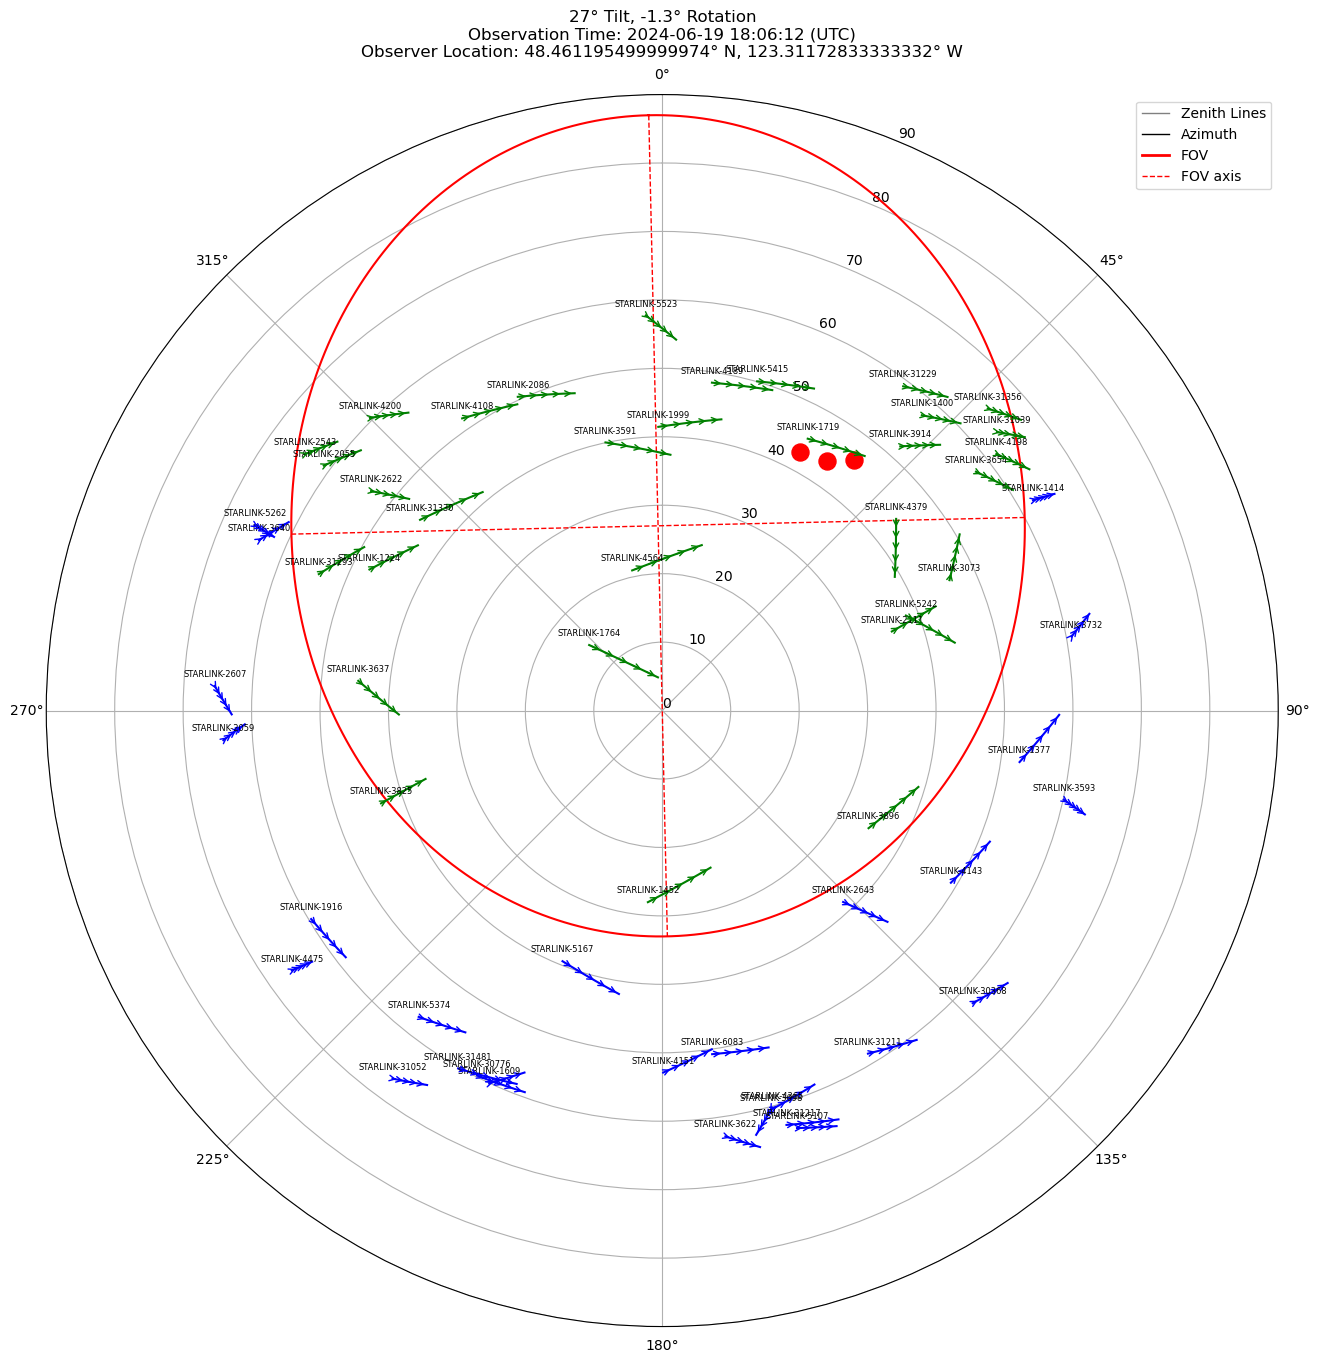

Satellites inside the FOV: ['STARLINK-1224', 'STARLINK-1452', 'STARLINK-1400', 'STARLINK-1719', 'STARLINK-1764', 'STARLINK-2055', 'STARLINK-2086', 'STARLINK-2111', 'STARLINK-1999', 'STARLINK-2543', 'STARLINK-2622', 'STARLINK-3073', 'STARLINK-3637', 'STARLINK-3591', 'STARLINK-3654', 'STARLINK-3896', 'STARLINK-3825', 'STARLINK-3914', 'STARLINK-4108', 'STARLINK-4189', 'STARLINK-4198', 'STARLINK-4200', 'STARLINK-4379', 'STARLINK-4564', 'STARLINK-5242', 'STARLINK-5415', 'STARLINK-5523', 'STARLINK-31039', 'STARLINK-31330', 'STARLINK-31293', 'STARLINK-31356', 'STARLINK-31229']
Closest satellites at the start of the interval (in order):


In [18]:
from skyfield.api import load, wgs84
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import math
from concurrent.futures import ThreadPoolExecutor

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time_now():
    ts = load.timescale()
    return ts.now() - timedelta(seconds=1)

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_positions_for_satellite(satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation):
    positions = []
    altitudes = []
    distances = []
    for second in range(0, interval_seconds + 1, step_seconds):
        current_time = start_time + timedelta(seconds=second)
        difference = satellite - observer_location
        topocentric = difference.at(current_time)
        alt, az, distance = topocentric.altaz()
        positions.append((90 - alt.degrees, np.radians(az.degrees)))
        altitudes.append(alt.degrees)
        distances.append(distance.km)

    if any(alt > min_elevation for alt in altitudes):
        return satellite.name, positions, distances[0]
    return None

def calculate_satellite_positions_over_time(satellites, observer_location, start_time, interval_seconds, step_seconds=3):
    min_elevation = 25
    positions_over_time = {}
    satellite_distances = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_positions_for_satellite, satellite, observer_location, start_time, interval_seconds, step_seconds, min_elevation) for satellite in satellites]
        for future in futures:
            result = future.result()
            if result is not None:
                satellite_name, positions, initial_distance = result
                positions_over_time[satellite_name] = positions
                satellite_distances.append((satellite_name, initial_distance))

    # Sort satellites by initial distance
    satellite_distances.sort(key=lambda x: x[1])
    
    return positions_over_time, satellite_distances

def rotate_points(x, y, angle):
    x_rot = x * np.cos(angle) - y * np.sin(angle)
    y_rot = x * np.sin(angle) + y * np.cos(angle)
    return x_rot, y_rot

def draw_fov(tilt_deg, rotation_deg, positions_over_time, observation_time, observer_location):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(16, 16))

    # Plot settings
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    zenith_legend = plt.Line2D([0], [0], color='gray', linestyle='-', linewidth=1, label='Zenith Lines')
    azimuth_legend = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Azimuth')
    FOV = plt.Line2D([0], [0], color='red', linestyle='-', linewidth=2, label='FOV')
    Axis = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='FOV axis')
    ax.add_artist(zenith_legend)
    ax.add_artist(azimuth_legend)
    ax.add_artist(FOV)
    ax.add_artist(Axis)

    # FOV ellipse
    base_radius = 60
    center_shift = tilt_deg
    x_radius = base_radius
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)

    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta) + center_shift
    y = y_radius * np.sin(theta)
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x) + np.deg2rad(rotation_deg)
    ax.plot(angles, r, 'r')

    # Plot major and minor axes
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, np.deg2rad(rotation_deg))
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, np.deg2rad(rotation_deg))
    ax.plot(np.arctan2(major_axis_y_rot, major_axis_x_rot), np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2), 'red', linestyle='--', linewidth=1)
    ax.plot(np.arctan2(minor_axis_y_rot, minor_axis_x_rot), np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2), 'red', linestyle='--', linewidth=1)

    inside_fov = []

    # Plot satellite traces with arrows
    for satellite_name, positions in positions_over_time.items():
        r = [pos[0] for pos in positions]
        angle = [pos[1] for pos in positions]
        inside = False
        for r_i, angle_i in zip(r, angle):
            x_point = r_i * np.cos(angle_i)
            y_point = r_i * np.sin(angle_i)
            x_point_rot, y_point_rot = rotate_points(x_point, y_point, -np.deg2rad(rotation_deg))
            x_point_rot -= center_shift
            if (x_point_rot**2 / x_radius**2) + (y_point_rot**2 / y_radius**2) <= 1:
                inside = True
                break
        color = "g" if inside else "b"
        ax.plot(angle, r, color=color)
        for i in range(0, len(angle) - 1, max(1, len(angle) // 10)):
            ax.annotate('', xy=(angle[i + 1], r[i + 1]), xytext=(angle[i], r[i]),
                        arrowprops=dict(arrowstyle='->', color=color))
        if inside:
            inside_fov.append(satellite_name)
        ax.annotate(satellite_name, xy=(angle[0], r[0]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=6, bbox=dict(boxstyle='round,pad=0.5', edgecolor='none', facecolor='none', alpha=0.6))

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Format the observation time
    observation_time_str = observation_time.utc_strftime('%Y-%m-%d %H:%M:%S (UTC)')
    latitude_str = f"{abs(observer_location.latitude.degrees)}° {'N' if observer_location.latitude.degrees >= 0 else 'S'}"
    longitude_str = f"{abs(observer_location.longitude.degrees)}° {'E' if observer_location.longitude.degrees >= 0 else 'W'}"
    observer_location_str = f"{latitude_str}, {longitude_str}"
    ax.set_title(f'{tilt_deg}° Tilt, {rotation_deg}° Rotation\nObservation Time: {observation_time_str}\nObserver Location: {observer_location_str}', va='bottom')
    for alt, az in observed_positions:
        ax.scatter(np.deg2rad(az), alt, color='red', marker='o', s=150)
    plt.show()
    print("Satellites inside the FOV:", inside_fov)

if __name__ == "__main__":
    satellites = load_data()
    initial_time = set_observation_time(2024, 6, 19, 18, 6, 12)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    interval_seconds = 15
    positions_over_time, satellite_distances = calculate_satellite_positions_over_time(satellites, observer_location, initial_time, interval_seconds, step_seconds=3)
    draw_fov(27, -1.3, positions_over_time, initial_time, observer_location)
    
    # Output the closest satellites at the start of the interval
    print("Closest satellites at the start of the interval (in order):")
    # for name, distance in satellite_distances:
    #     print(f"{name}: {distance:.2f} km")


In [17]:
observed_positions

[(42.794859504384405, 28.08061216788235),
 (43.74128484624109, 33.38034472384487),
 (46.05616136848577, 37.38780591866447)]

In [2]:
from skyfield.api import load, wgs84, utc
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def process_observed_data(filename):
    data = pd.read_csv(filename, sep=',', header=None, names=['Timestamp', 'Y', 'X'])
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
    
    observer_x, observer_y = 62, 62-(27/1.3)  # Assume this is the observer's pixel location
    pixel_to_degrees = 1.3  # Conversion factor from pixel to degrees
    
    positions = []
    for index, point in data.iterrows():
        dx, dy = point['X'] - observer_x, point['Y'] - observer_y
        radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
        azimuth = np.degrees(np.arctan2(dx, dy))
        # Normalize the azimuth to ensure it's within 0 to 360 degrees
        azimuth = (azimuth + 360) % 360
        elevation = 90 - radius
        positions.append((point['Timestamp'], point['Y'], point['X'], 90-elevation, azimuth-1))
    
    df_positions = pd.DataFrame(positions, columns=['Timestamp', 'Y', 'X', 'Elevation', 'Azimuth'])
    return df_positions

def main(filename, year, month, day, hour, minute, second):
    initial_time = set_observation_time(year, month, day, hour, minute, second)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    satellites = load_data()
    observed_positions = process_observed_data(filename)
    if not observed_positions.empty:
        print(observed_positions)
        observed_positions.to_csv('processed_observed_data.csv', index=False)
    else:
        print("No valid observed data found.")
    return observed_positions

if __name__ == "__main__":
    filename = 'white_pixel_coordinates_xor.csv'
    observed_positions = main(filename, 2024, 6, 19, 18, 6, 12)


Loaded 6147 satellites
                     Timestamp   Y   X  Elevation     Azimuth
0    2024-06-19 18:02:57+00:00  50  41  29.584624  291.664557
1    2024-06-19 18:02:58+00:00  50  41  29.584624  291.664557
2    2024-06-19 18:02:59+00:00  50  42  28.389435  292.675603
3    2024-06-19 18:03:00+00:00  51  42  28.935964  295.033730
4    2024-06-19 18:03:01+00:00  51  42  28.935964  295.033730
...                        ...  ..  ..        ...         ...
3466 2024-06-19 19:12:06+00:00  71  54  40.073058  343.958062
3467 2024-06-19 19:12:07+00:00  71  55  39.755503  345.767732
3468 2024-06-19 19:12:08+00:00  71  55  39.755503  345.767732
3469 2024-06-19 19:12:09+00:00  70  56  38.204712  347.219476
3470 2024-06-19 19:12:10+00:00  70  56  38.204712  347.219476

[3471 rows x 5 columns]


In [3]:
observed_positions

,Timestamp,Y,X,Elevation,Azimuth
0,2024-06-19 18:02:57+00:00,50,41,29.584624,291.664557
1,2024-06-19 18:02:58+00:00,50,41,29.584624,291.664557
2,2024-06-19 18:02:59+00:00,50,42,28.389435,292.675603
3,2024-06-19 18:03:00+00:00,51,42,28.935964,295.033730
4,2024-06-19 18:03:01+00:00,51,42,28.935964,295.033730
...,...,...,...,...,...
3466,2024-06-19 19:12:06+00:00,71,54,40.073058,343.958062
3467,2024-06-19 19:12:07+00:00,71,55,39.755503,345.767732
3468,2024-06-19 19:12:08+00:00,71,55,39.755503,345.767732
3469,2024-06-19 19:12:09+00:00,70,56,38.204712,347.219476


In [4]:
from skyfield.api import load, wgs84, utc
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def process_observed_data(filename):
    data = pd.read_csv(filename, sep=',', header=None, names=['Timestamp', 'Y', 'X'])
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
    
    observer_x, observer_y = 62, 62-(27/1.3)  # Assume this is the observer's pixel location
    pixel_to_degrees = 1.3  # Conversion factor from pixel to degrees
    
    positions = []
    for index, point in data.iterrows():
        dx, dy = point['X'] - observer_x, point['Y'] - observer_y
        radius = np.sqrt(dx**2 + dy**2) * pixel_to_degrees
        azimuth = np.degrees(np.arctan2(dx, dy))
        # Normalize the azimuth to ensure it's within 0 to 360 degrees
        azimuth = (azimuth + 360) % 360
        elevation = 90 - radius
        positions.append((point['Timestamp'], point['Y'], point['X'], 90-elevation, azimuth-1))
    
    df_positions = pd.DataFrame(positions, columns=['Timestamp', 'Y', 'X', 'Elevation', 'Azimuth'])
    return df_positions

def main(filename, year, month, day, hour, minute, second):
    initial_time = set_observation_time(year, month, day, hour, minute, second)
    observer_location = wgs84.latlon(latitude_degrees=48.461195499999974, longitude_degrees=-123.31172833333332, elevation_m=73)
    satellites = load_data()
    observed_positions = process_observed_data(filename)
    if not observed_positions.empty:
        print(observed_positions)
        observed_positions.to_csv('processed_observed_data.csv', index=False)
    else:
        print("No valid observed data found.")
    return observed_positions

if __name__ == "__main__":
    filename = 'white_pixel_coordinates_xor.csv'
    observed_positions = main(filename, 2024, 6, 19, 18, 6, 12)


Loaded 6147 satellites
                     Timestamp   Y   X  Elevation     Azimuth
0    2024-06-19 18:02:57+00:00  50  41  29.584624  291.664557
1    2024-06-19 18:02:58+00:00  50  41  29.584624  291.664557
2    2024-06-19 18:02:59+00:00  50  42  28.389435  292.675603
3    2024-06-19 18:03:00+00:00  51  42  28.935964  295.033730
4    2024-06-19 18:03:01+00:00  51  42  28.935964  295.033730
...                        ...  ..  ..        ...         ...
3466 2024-06-19 19:12:06+00:00  71  54  40.073058  343.958062
3467 2024-06-19 19:12:07+00:00  71  55  39.755503  345.767732
3468 2024-06-19 19:12:08+00:00  71  55  39.755503  345.767732
3469 2024-06-19 19:12:09+00:00  70  56  38.204712  347.219476
3470 2024-06-19 19:12:10+00:00  70  56  38.204712  347.219476

[3471 rows x 5 columns]


In [5]:
observed_positions

,Timestamp,Y,X,Elevation,Azimuth
0,2024-06-19 18:02:57+00:00,50,41,29.584624,291.664557
1,2024-06-19 18:02:58+00:00,50,41,29.584624,291.664557
2,2024-06-19 18:02:59+00:00,50,42,28.389435,292.675603
3,2024-06-19 18:03:00+00:00,51,42,28.935964,295.033730
4,2024-06-19 18:03:01+00:00,51,42,28.935964,295.033730
...,...,...,...,...,...
3466,2024-06-19 19:12:06+00:00,71,54,40.073058,343.958062
3467,2024-06-19 19:12:07+00:00,71,55,39.755503,345.767732
3468,2024-06-19 19:12:08+00:00,71,55,39.755503,345.767732
3469,2024-06-19 19:12:09+00:00,70,56,38.204712,347.219476
